# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [53]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
# Importing csv file into notebook
df = pd.read_csv(r"..\ml-project-unsupervised-learning\Wholesale_Data.csv")

In [3]:
# First five entries to check format
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Drawing more insight
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Checking for null values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []


In [7]:
# Checking for missing values by identifying zero values within key columns 
columns_to_check = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

no_zero_sum_columns = df.select_dtypes(include=[np.number])[columns_to_check]

# Create a boolean dataFrame where True represents zero values
zero_values = no_zero_sum_columns.eq(0)

zero_values.sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Dataframe seems complete, and lacking any obvious errors.

In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# Assesing correlations between different columns
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [10]:
# Calculating the mean value of each column, sorted by Region
df.groupby('Region').mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


In [11]:
# Calculating the mean value of each column, sorted by Channel
df.groupby('Channel').mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


The two variables (Region & Channel) don’t really offer any more descriptive attributes, I can't accurately determine their significance or if there is any overlap. 

My assumption is that Regional is geographically based while channel has to do with supply chain exit points. We could possibly make some comparisons based off these assumptions, but I will attempt to remain within the scope of the project.


c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


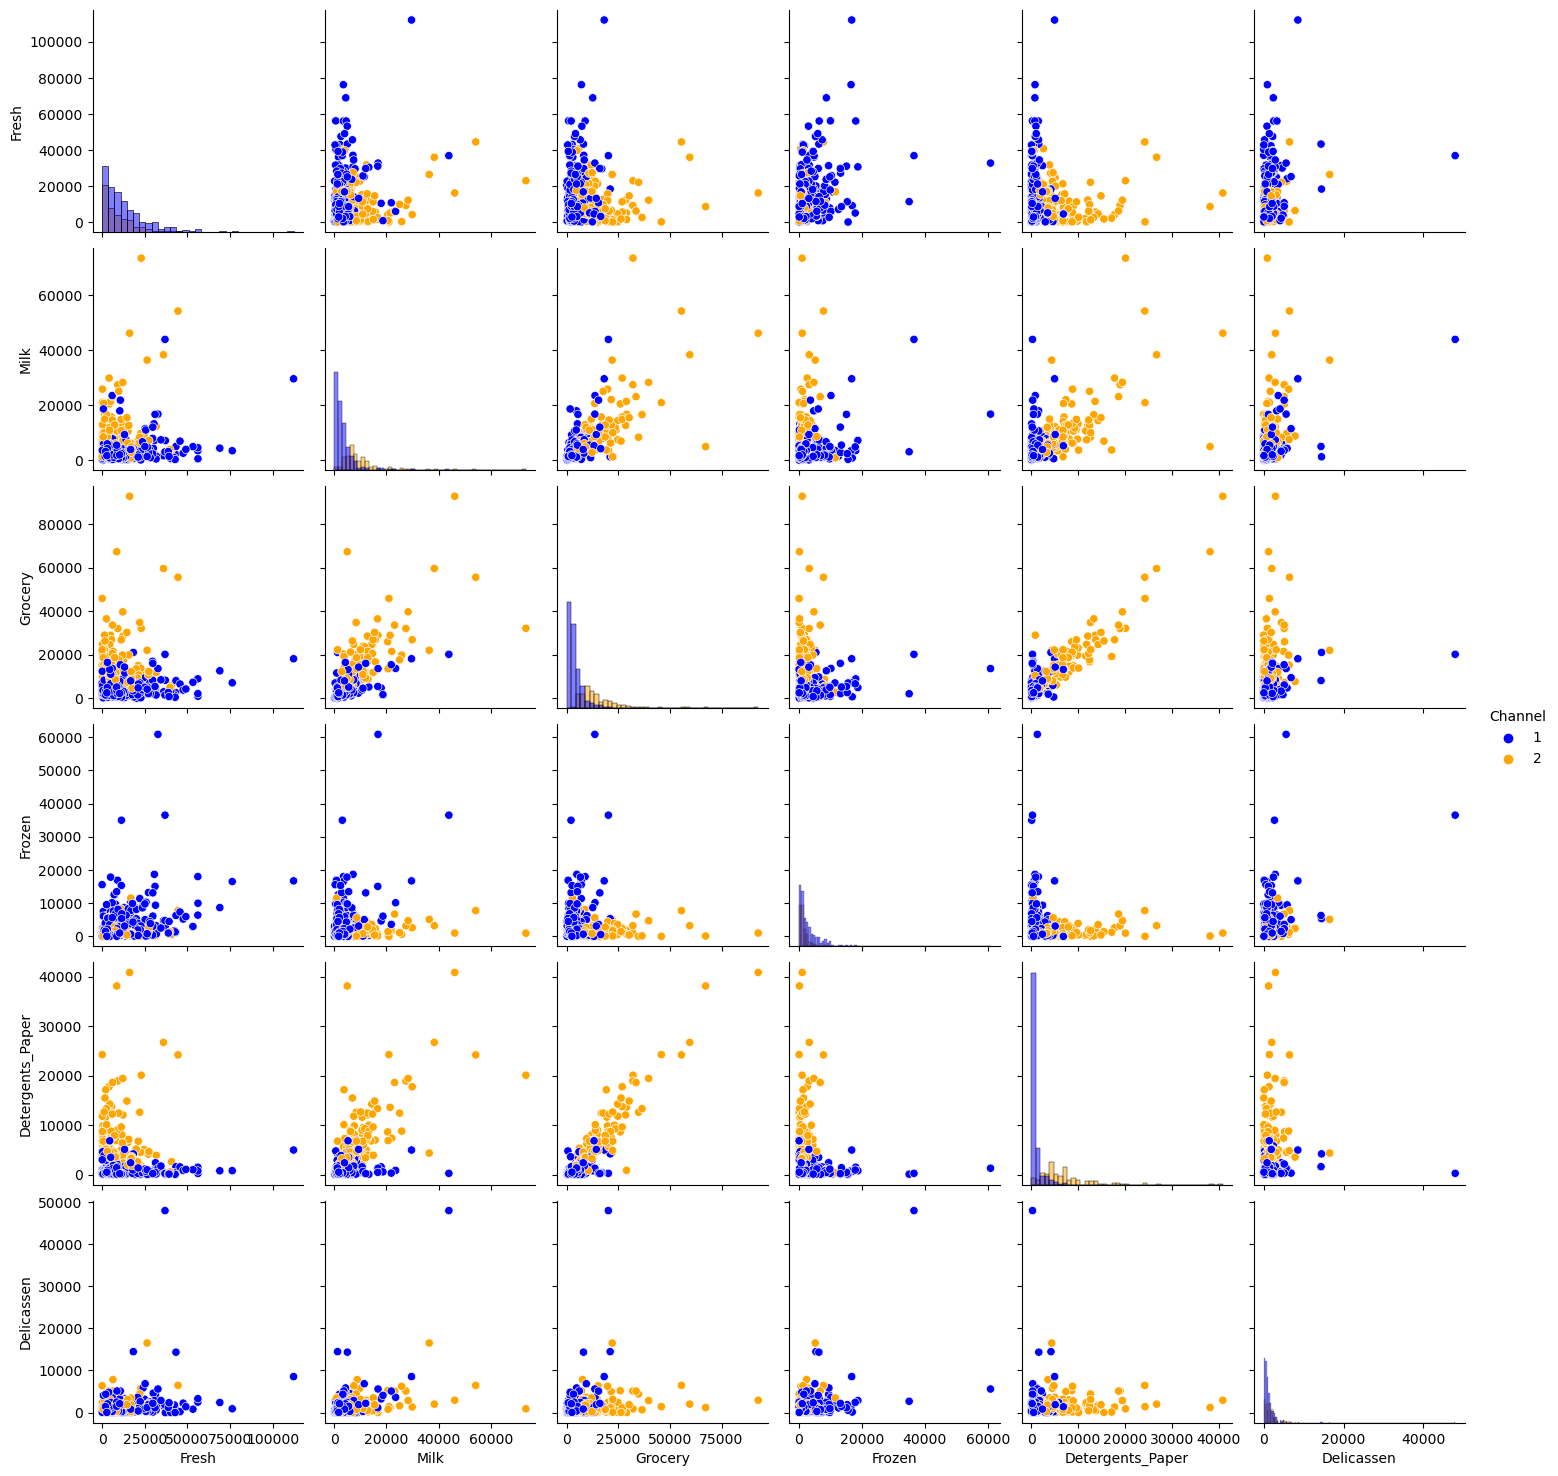

In [49]:
custom_palette = ['blue', 'orange']
sns.pairplot(df[['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']], hue='Channel', diag_kind= 'hist', palette=custom_palette)

plt.savefig(r"images/large_pairplot.png")

### Analysis
based on the pairplot data, we can see some positive correlation between:
- Grocery and detergent paper
- milk and detergent paper

Ther also appears to be some sporadic outliers, but further analysis is necessary. 
Significant pockets of data
30,000 seems to be the upper limit for the vast majority for multiple columns within our dataset.
In order to identify and remove outliers, I set the upper limit for our dataset to 30,000 units of measurement. After assessing the mean and other statistical parameters of the dataset, I still feel as if this number is quite high. However, this number was chosen because it could be universally applied, to remove any extreme values, while maintaining some of our larger quantities, as many of our columns are exhibiting some correlations. The "Grocery" value was utilized as the main determining factor in this decision, as it had the most outliers, but still provided significant value to my analysis. 
My initial thought is that Grocery is a cumulative measurement, as it is significantly larger than other values, incorporating multiple columns. 
under normal circumstances, I would attempt to prove this by quantifying the values, but I will refrain to stay within the scope of this project.

In [12]:
# outliers within the Grocery column
print(df[df['Grocery'] > 30000]['Grocery'])

47     55571
61     59598
65     45828
85     92780
86     32114
92     32034
145    34792
211    39694
216    36486
251    33586
333    67298
437    30243
Name: Grocery, dtype: int64


In [13]:
df = df.drop(df[(df['Delicassen'] > 30000) | (df['Detergents_Paper'] > 30000) | (df['Frozen']> 30000) | (df['Grocery']> 30000) | (df['Milk']> 30000) | (df['Fresh']> 30000)].index)

# Reset index
df = df.reset_index(drop=True)

In [14]:
# Statitistics after removing outliers
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.073990,-0.164187,0.567478,0.715629,-0.225553,0.740342,0.131740
Region,0.073990,1.000000,0.012967,0.008124,0.015771,-0.030584,0.013159,0.022580
Fresh,-0.164187,0.012967,1.000000,-0.156451,-0.182749,0.255955,-0.272909,0.155579
Milk,0.567478,0.008124,-0.156451,1.000000,0.732730,-0.083295,0.654950,0.292402
Grocery,0.715629,0.015771,-0.182749,0.732730,1.000000,-0.169813,0.858917,0.233446
Frozen,-0.225553,-0.030584,0.255955,-0.083295,-0.169813,1.000000,-0.226889,0.126861
Detergents_Paper,0.740342,0.013159,-0.272909,0.654950,0.858917,-0.226889,1.000000,0.094008
Delicassen,0.131740,0.022580,0.155579,0.292402,0.233446,0.126861,0.094008,1.000000


In [15]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,1.319797,2.535533,9198.601523,4908.279188,6909.527919,2551.779188,2436.233503,1250.032995
std,0.466991,0.774929,7558.206424,4695.581765,6415.631394,2966.006737,3254.690526,1383.814304
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,2927.500000,1477.750000,2132.500000,676.750000,256.250000,395.000000
50%,1.000000,3.000000,7326.500000,3575.500000,4592.500000,1455.500000,799.500000,834.000000
75%,2.000000,3.000000,13740.250000,6751.750000,10065.500000,3148.500000,3866.250000,1644.500000
max,2.000000,3.000000,29955.000000,29892.000000,28986.000000,17866.000000,17740.000000,14472.000000


c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


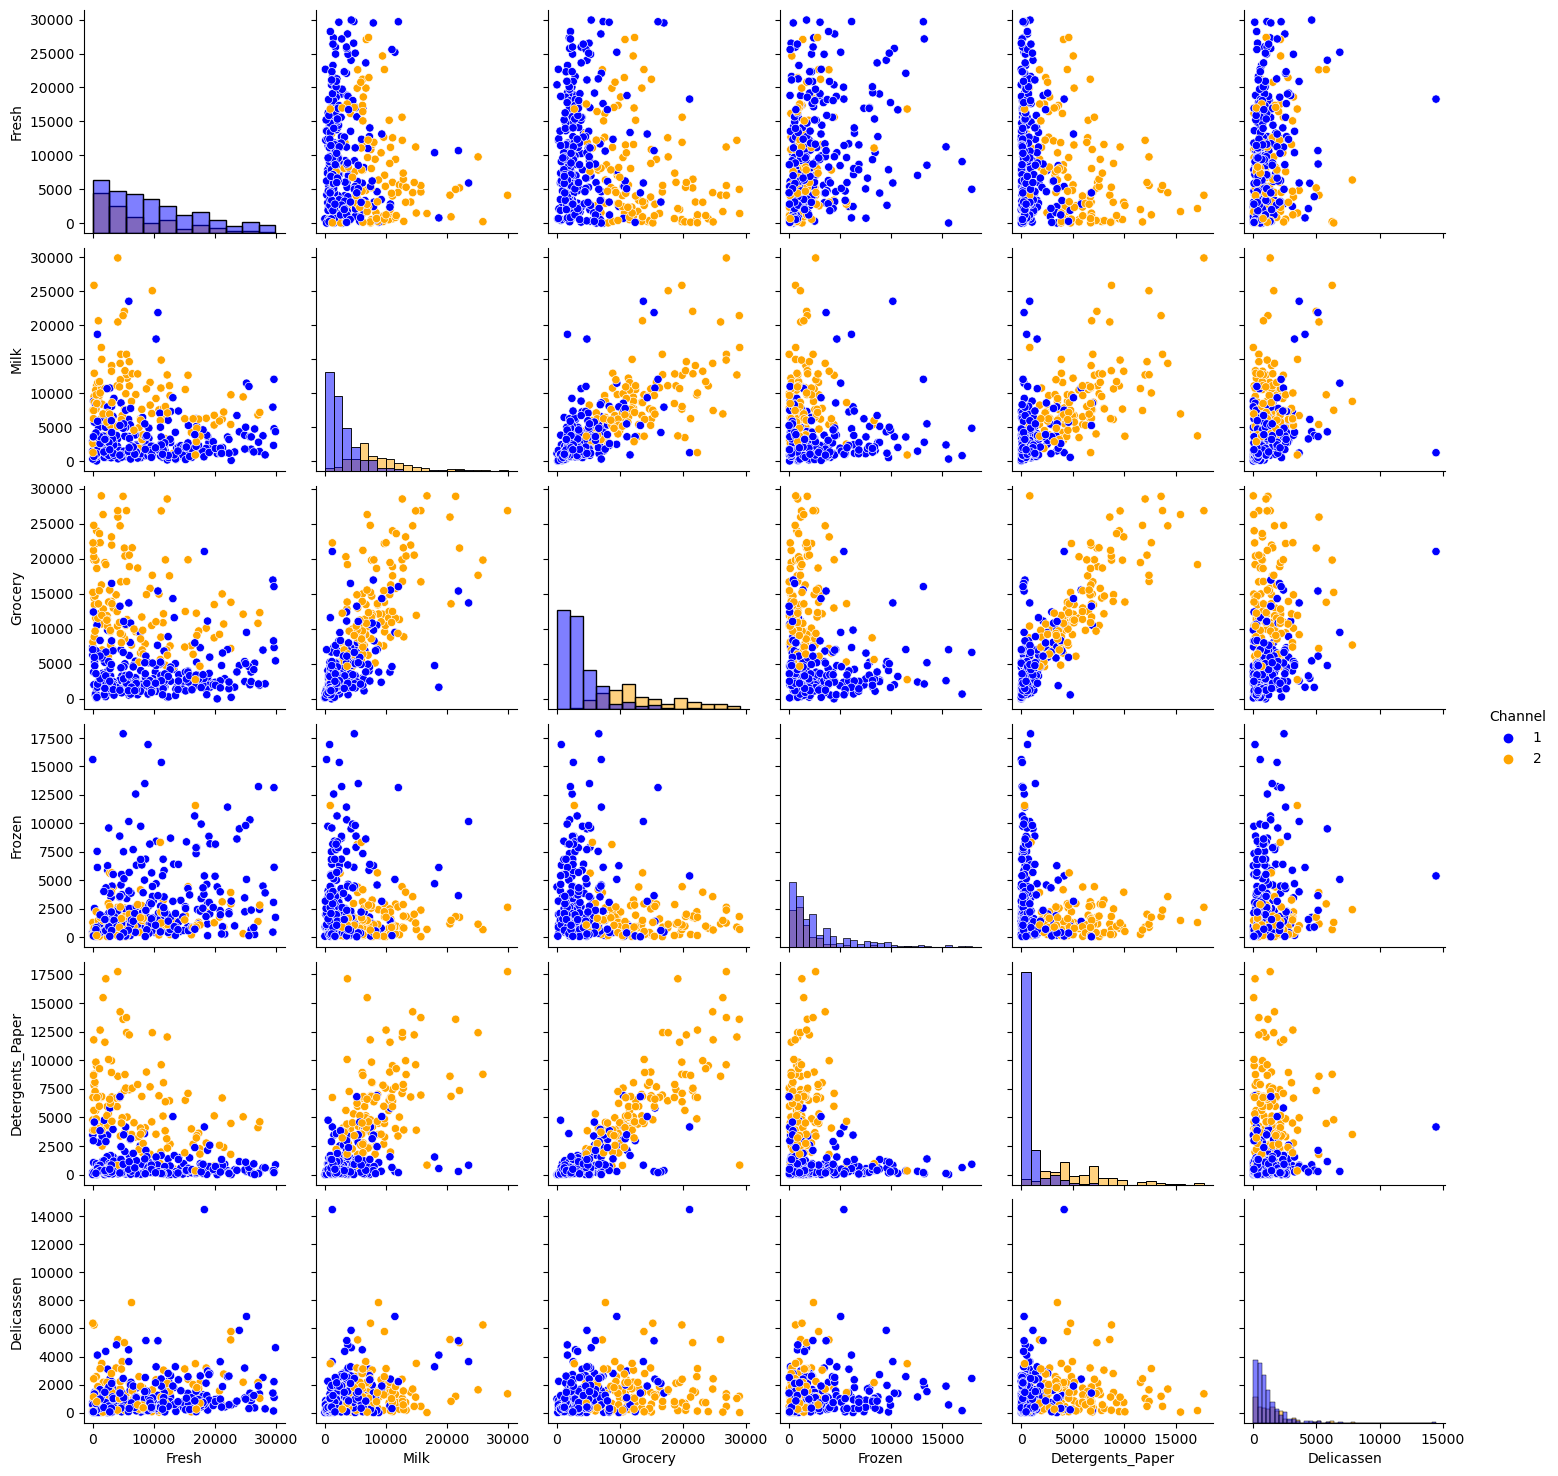

In [53]:
custom_palette = ['blue', 'orange']
sns.pairplot(df[['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']], hue='Channel', diag_kind= 'hist', palette=custom_palette)

plt.savefig(r"images/large_pairplot_2.png")

Spread appears much tighter across the board. However I will make further adjustments. 

In [16]:
df = df.drop(df[(df['Delicassen'] > 10000)].index)



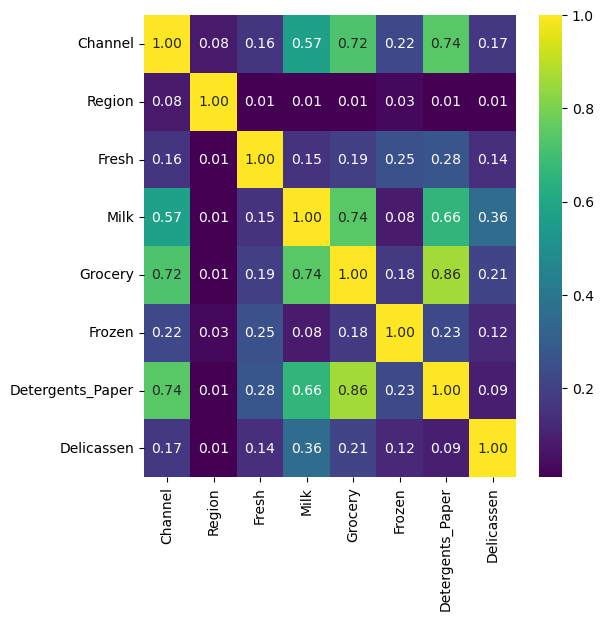

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(np.abs(df.corr()), annot=True, cmap='viridis', fmt='0.02f')

plt.savefig(r"images/heatmap_corr.png")

In [18]:
df_clean = df

df_clean = df_clean.to_csv("data/df_clean.csv")

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [19]:
def optimize_kmeans(X, max_clusters):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()  

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

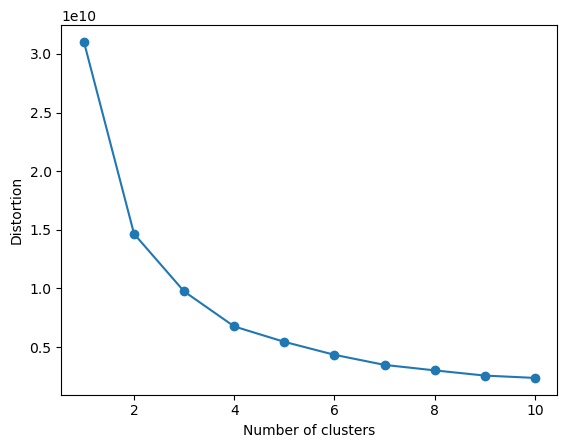

In [20]:
optimize_kmeans(df[['Fresh', 'Milk']], 10)

In [41]:
X = df.iloc[:,[2,3]].values
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [42]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

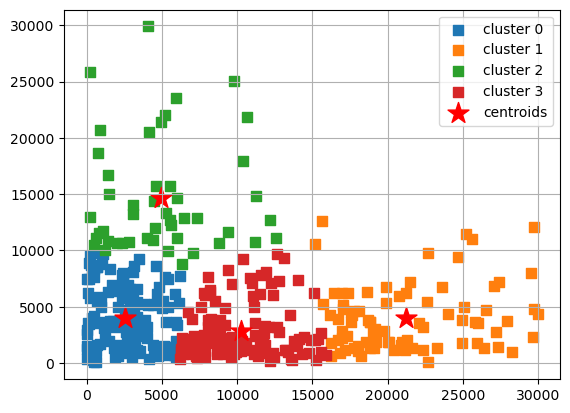

<Figure size 640x480 with 0 Axes>

In [43]:
plot_clusters(X, y_km, plt_cluster_centers= True)

plt.savefig(r"images/kmeans_cluster_fresh_milk.png")

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

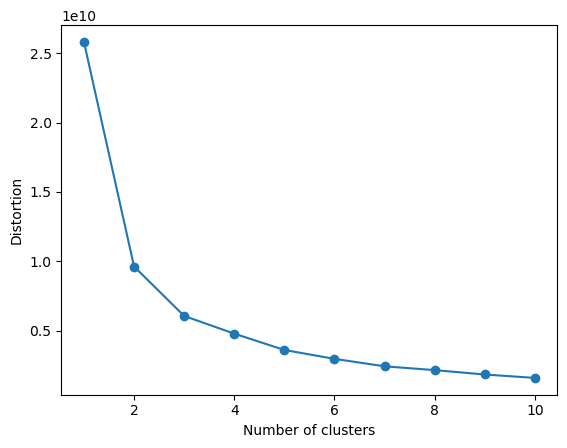

In [40]:
optimize_kmeans(df[['Fresh', 'Frozen']], 10)

In [45]:
X = df.iloc[:,[2,5]].values
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [46]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

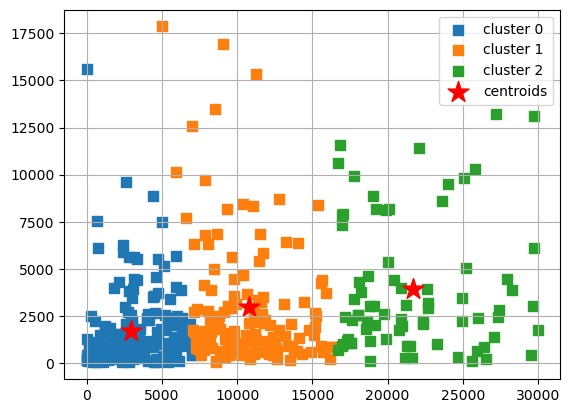

<Figure size 640x480 with 0 Axes>

In [47]:
plot_clusters(X, y_km, plt_cluster_centers= True)

plt.savefig(r"images/kmeans_cluster_fresh_Frozen.png")

In [50]:
X = df.iloc[:,[3,6]].values
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

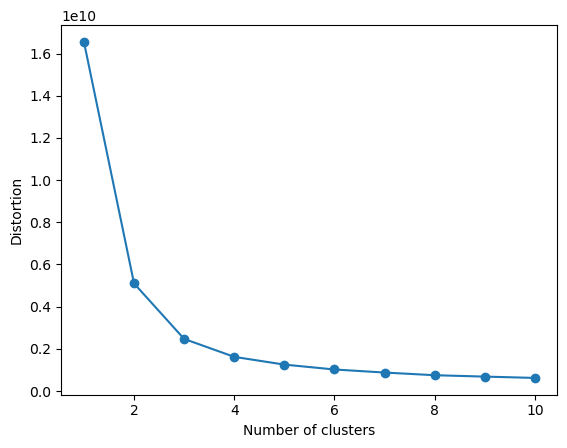

In [49]:
optimize_kmeans(df[['Grocery', 'Delicassen']], 10)

In [51]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

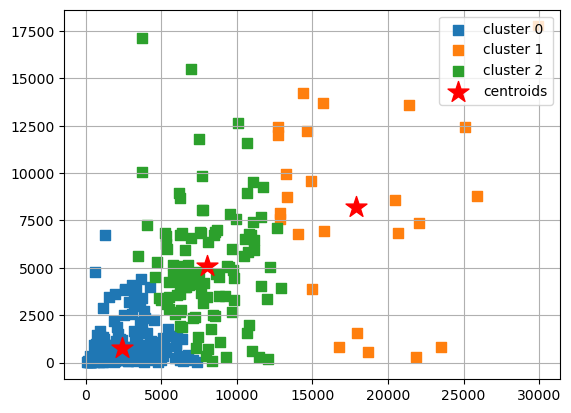

<Figure size 640x480 with 0 Axes>

In [52]:
plot_clusters(X, y_km, plt_cluster_centers= True)

plt.savefig(r"images/kmeans_cluster_Delicassen.png")

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [57]:
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [54]:
X = df.iloc[:,[2,5]].values

def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

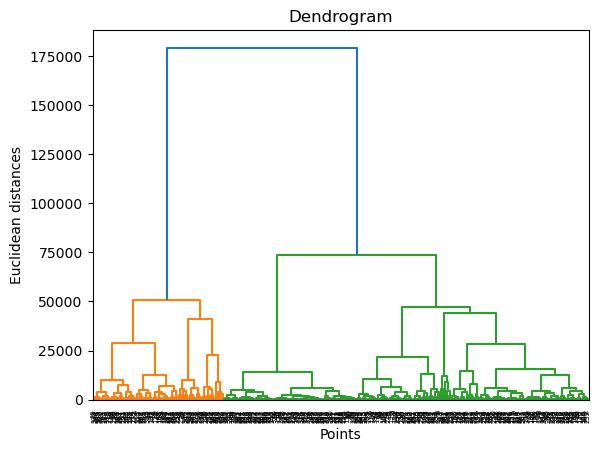

In [55]:
plot_dendrogram(X)

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


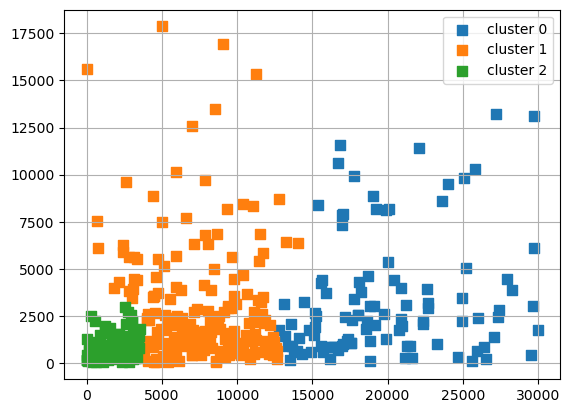

In [58]:
y_hc = ac.fit_predict(X)
plot_clusters(X,y_hc)

# Part IV - PCA

In this section you are going to perform   (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [59]:
columns_to_drop = ['Channel', 'Region']

df_pca = df.drop(columns=columns_to_drop)

In [60]:
pca = PCA(n_components=None)

df_pca = pca.fit(df_pca)

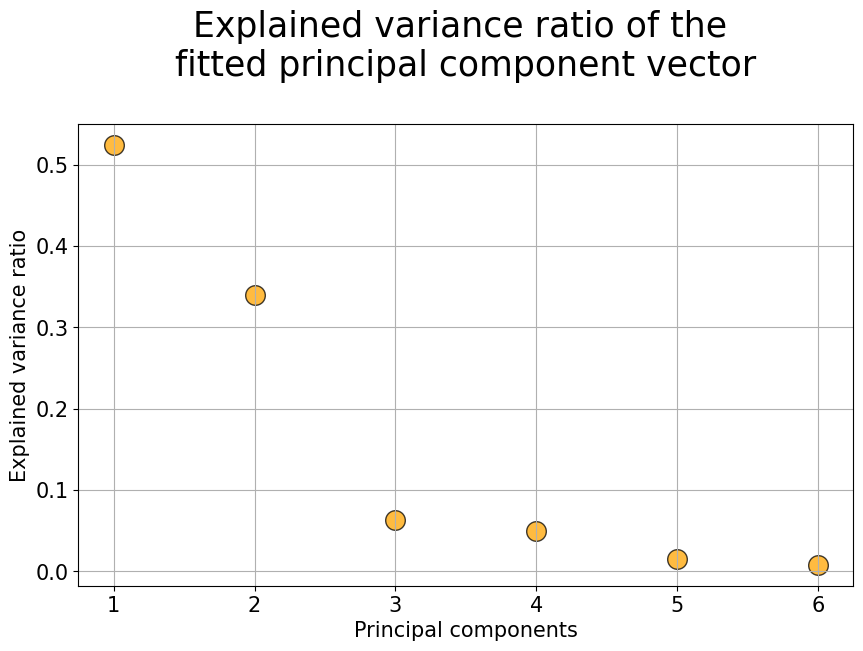

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))],
            y=df_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [63]:
pca.explained_variance_ratio_

array([0.52464445, 0.33936233, 0.06325702, 0.04915604, 0.0155139 ,
       0.00806626])

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.